# 

title: Water Rights Restored to the Gila River

subtitle: The impacts of irrigation on vegetation health in the Gila
River Valley

author:

-   Elsa Culler

-   Nate Quarderer

date: last-modified

image: /img/earth-analytics/water-rights/lesson-water-rights.png

image-alt: “Dry river with dead plants turns into a stream with living
plants”

description: \|

In 2004, the Akimel O’‘otham and Tohono O’’odham tribes won a water
rights settlement in the US Supreme Court. Using satellite imagery, we
can see the effects of irrigation water on the local vegetation.

learning-goals:

-   Open raster or image data using code

-   Combine raster data and vector data to crop images to an area of
    interest

-   Summarize raster values with stastics

-   Analyze a time-series of raster images

params:

id: stars

site_name: Gila River Indian Community

event: water rights case

data_dir: gila-river

jupyter:

kernelspec:

    name: learning-portal

    language: python

    display_name: Learning Portal

# STEP 0: Set up

To get started on this notebook, you’ll need to restore any variables
from previous notebooks to your workspace. To save time and memory, make
sure to specify which variables you want to load.

In [1]:
%store -r

Unable to restore variable 'ndvi_diff', ignoring (use %store -d to forget!)
The error was: <class 'KeyError'>


You will also need to import any libraries you are using in this
notebook, since they won’t carry over from the previous notebook:

In [2]:
# Import libraries
import matplotlib.pyplot as plt
import rioxarray as rxr
import xarray as xr
import hvplot.pandas
import hvplot.xarray # interactive plotting using raster data


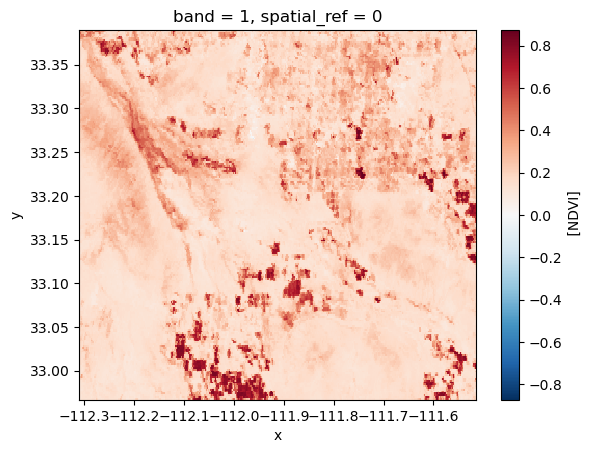

In [3]:
# Quick plot of the last tif image
rxr.open_rasterio(ndvi_paths[-1], mask_and_scale=True).squeeze().plot()


Text(0.5, 1.0, 'NDVI - Gila River 2022')

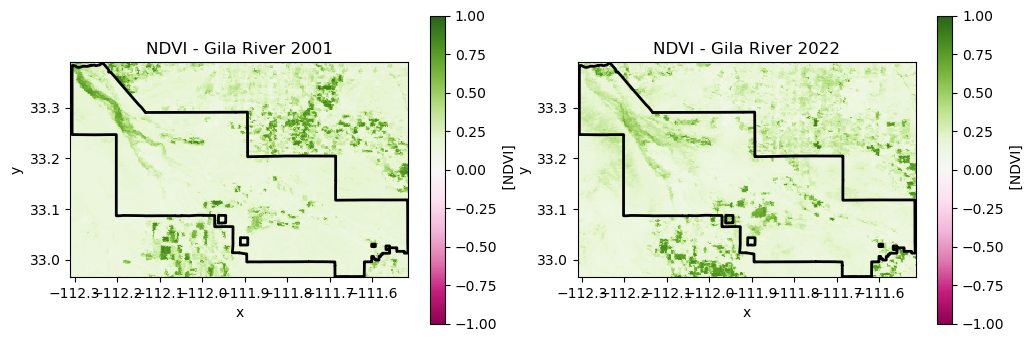

In [4]:
# Plot first and last NDVI tif side by side

# Define first and last image
recent_ndvi = rxr.open_rasterio(ndvi_paths[-1], mask_and_scale=True).squeeze()
old_ndvi = rxr.open_rasterio(ndvi_paths[0], mask_and_scale=True).squeeze()

# Create side by side plot
fig, axes = plt.subplots(1, 2, figsize =(12,4))


# Plot each in their own axes

# First NDVI 
old_ndvi.plot(ax=axes[0], cmap=plt.cm.PiYG, vmin=-1,vmax=1)
# Plot boundary
gila_gdf.plot(ax=axes[0], edgecolor='black', 
              facecolor='none', linewidth=2)
axes[0].set_title("NDVI - Gila River 2001")

# Recent NDVI
recent_ndvi.plot(ax=axes[1], cmap=plt.cm.PiYG, vmin=-1,vmax=1)
# Plot boundary
gila_gdf.plot(ax=axes[1], edgecolor='black', 
              facecolor='none', linewidth=2)
axes[1].set_title("NDVI - Gila River 2022")

# STEP 3: Plot NDVI

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Plot the change in NDVI spatially</div></div><div class="callout-body-container callout-body"><p>Complete the following:</p>
<ul>
<li>Select data from 2021 to 2023 (3 years after the <span
data-__quarto_custom="true" data-__quarto_custom_type="Shortcode"
data-__quarto_custom_context="Inline"
data-__quarto_custom_id="1"></span>)</li>
<li>Take the temporal mean (over the <strong>date</strong>, not
spatially)</li>
<li>Get the NDVI variable (should be a DataArray, not a Dataset)</li>
<li>Repeat for the data from 2018 to 2020 (3 years before the <span
data-__quarto_custom="true" data-__quarto_custom_type="Shortcode"
data-__quarto_custom_context="Inline"
data-__quarto_custom_id="2"></span>)</li>
<li>Subtract the 2018-2020 time period <strong>from</strong> the
2021-2023 time period</li>
<li>Plot the result using a <strong>diverging</strong> color map like
<code>cmap=plt.cm.PiYG</code></li>
</ul>
<p>There are different types of color maps for different types of data.
In this case, we want decreases to be a different color from increases,
so we should use a <strong>diverging</strong> color map. Check out
available colormaps in the <a
href="https://matplotlib.org/stable/tutorials/colors/colormaps.html">matplotlib
documentation</a>.</p></div></div>

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-extra"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Looking for an Extra Challenge?</div></div><div class="callout-body-container callout-body"><p>For an extra challenge, add the <span data-__quarto_custom="true"
data-__quarto_custom_type="Shortcode"
data-__quarto_custom_context="Inline"
data-__quarto_custom_id="3"></span> boundary to the plot.</p></div></div>

In [5]:
# Compute the difference in NDVI before and after water rights were returned in 2004

# First decade
ndvi_2001_2011 = ndvi_da.sel(date=slice('2001','2011')).mean('date').NDVI

# Second decade
ndvi_2012_2022 = ndvi_da.sel(date=slice('2012','2022')).mean('date').NDVI

# Difference
ndvi_diff = (
    ndvi_2012_2022
    - ndvi_2001_2011
)

# Check diff
ndvi_diff


<xarray.DataArray 'NDVI' (y: 203, x: 382)> Size: 310kB
array([[-0.05567682, -0.0292117 ,  0.00586349, ...,  0.01543377,
         0.01543377,  0.00927271],
       [-0.07940263, -0.03390124, -0.02959213, ...,  0.01815718,
         0.01815718,  0.0177182 ],
       [-0.17723629, -0.08530393,  0.01360923, ...,  0.01517531,
         0.00823637,  0.01195324],
       ...,
       [-0.0115844 , -0.0115844 , -0.00991558, ..., -0.00157142,
        -0.00157142,  0.00205326],
       [-0.01115062, -0.01115062, -0.00994415, ...,  0.00598571,
         0.00598571, -0.00095583],
       [-0.00930774, -0.00849222, -0.01209998, ..., -0.0296714 ,
        -0.02090381, -0.03258313]], shape=(203, 382), dtype=float32)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 3kB -112.3 -112.3 -112.3 ... -111.5 -111.5 -111.5
  * y            (y) float64 2kB 33.39 33.39 33.38 33.38 ... 32.97 32.97 32.97
    spatial_ref  int64 8B 0

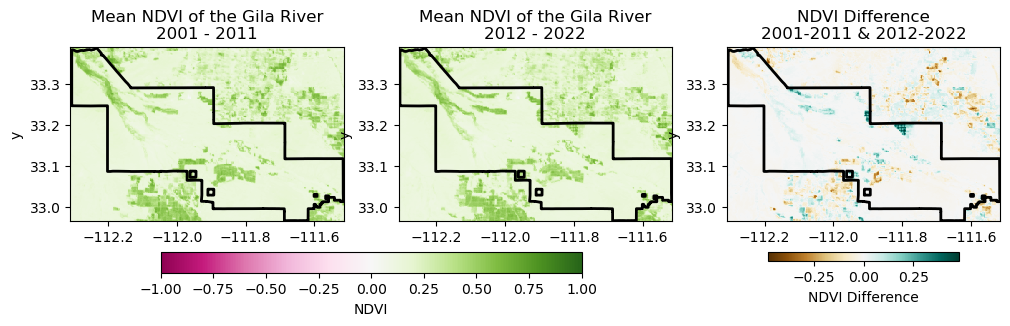

In [6]:
# Plot the difference - static

# Define first and last image
#recent_ndvi = rxr.open_rasterio(ndvi_paths[-1], mask_and_scale=True).squeeze()
#old_ndvi = rxr.open_rasterio(ndvi_paths[0], mask_and_scale=True).squeeze()

# Create side by side plot
fig, axes = plt.subplots(1, 3, figsize =(12,4))


# Plot each in their own axes

# First decade mean NDVI 
im1 = ndvi_2001_2011.plot(ax=axes[0], 
                    cmap=plt.cm.PiYG, 
                    vmin=-1,vmax=1,
                    add_colorbar=False
                    )
# Plot boundary
gila_gdf.plot(ax=axes[0], edgecolor='black', 
              facecolor='none', linewidth=2)
axes[0].set_title("Mean NDVI of the Gila River\n2001 - 2011")


# Recent NDVI
ndvi_2012_2022.plot(ax=axes[1], 
                    cmap=plt.cm.PiYG, 
                    vmin=-1,vmax=1,
                    add_colorbar=False)
# Plot boundary
gila_gdf.plot(ax=axes[1], edgecolor='black', 
              facecolor='none', linewidth=2)
axes[1].set_title("Mean NDVI of the Gila River\n2012 - 2022")

# Add in scale for first two plots
cbar1 = fig.colorbar(im1, 
                    ax=axes[:2], 
                    shrink=0.7, 
                    orientation="horizontal", 
                    pad=0.1)
cbar1.set_label("NDVI")


# Difference in NDVI
im2 = ndvi_diff.plot(ax=axes[2], 
                     cmap=plt.cm.BrBG,
                     add_colorbar=False)
# Plot boundary
gila_gdf.plot(ax=axes[2], edgecolor='black', 
              facecolor='none', linewidth=2)
axes[2].set_title("NDVI Difference\n2001-2011 & 2012-2022")

# Add in scale for difference plots
cbar2 = fig.colorbar(im2, 
                    ax=axes[2], 
                    shrink=0.7, 
                    orientation="horizontal", 
                    pad=0.1)
cbar2.set_label("NDVI Difference")

In [7]:
# Plot difference - interactive
# Using the PiYG color palette just to compare with the BrBG ramp
(
    ndvi_diff.hvplot(x='x', y='y', cmap='PiYG', geo=True, title="Change in NDVI between 2001-2011 and 2012-202")
    *
    gila_gdf.hvplot(geo=True, fill_color=None, line_color='black')

)

:Overlay
   .Image.I    :Image   [x,y]   (NDVI)
   .Polygons.I :Polygons   [Longitude,Latitude]

# STEP -1: Wrap up

Don’t forget to store your variables so you can use them in other
notebooks! Replace `var1` and `var2` with the variable you want to save,
separated by spaces.

In [9]:
%store ndvi_2001_2011 ndvi_2012_2022 ndvi_diff 

Stored 'ndvi_2001_2011' (DataArray)
Stored 'ndvi_2012_2022' (DataArray)
Stored 'ndvi_diff' (DataArray)


Finally, be sure to `Restart` and `Run all` to make sure your notebook
works all the way through!